In [ ]:
#Importing the Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score ,accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image, ImageTk
import tkinter as tk
from tkinter import messagebox

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [ ]:
# first 10 rows of the dataset
credit_card_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
credit_card_data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
credit_card_data.drop(["Time"],axis=1,inplace=True)

In [ ]:
credit_card_data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


array([[<Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>,
        <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>],
       [<Axes: title={'center': 'V11'}>, <Axes: title={'center': 'V12'}>,
        <Axes: title={'center': 'V13'}>, <Axes: title={'center': 'V14'}>,
        <Axes: title={'center': 'V15'}>],
       [<Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>,
        <Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>],
       [<Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>,
        <Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>,
        <Axes: title={'center': 'V25'}>],
       [<Axes: title={'center': 'V26'}>, <Axes: title={'cen

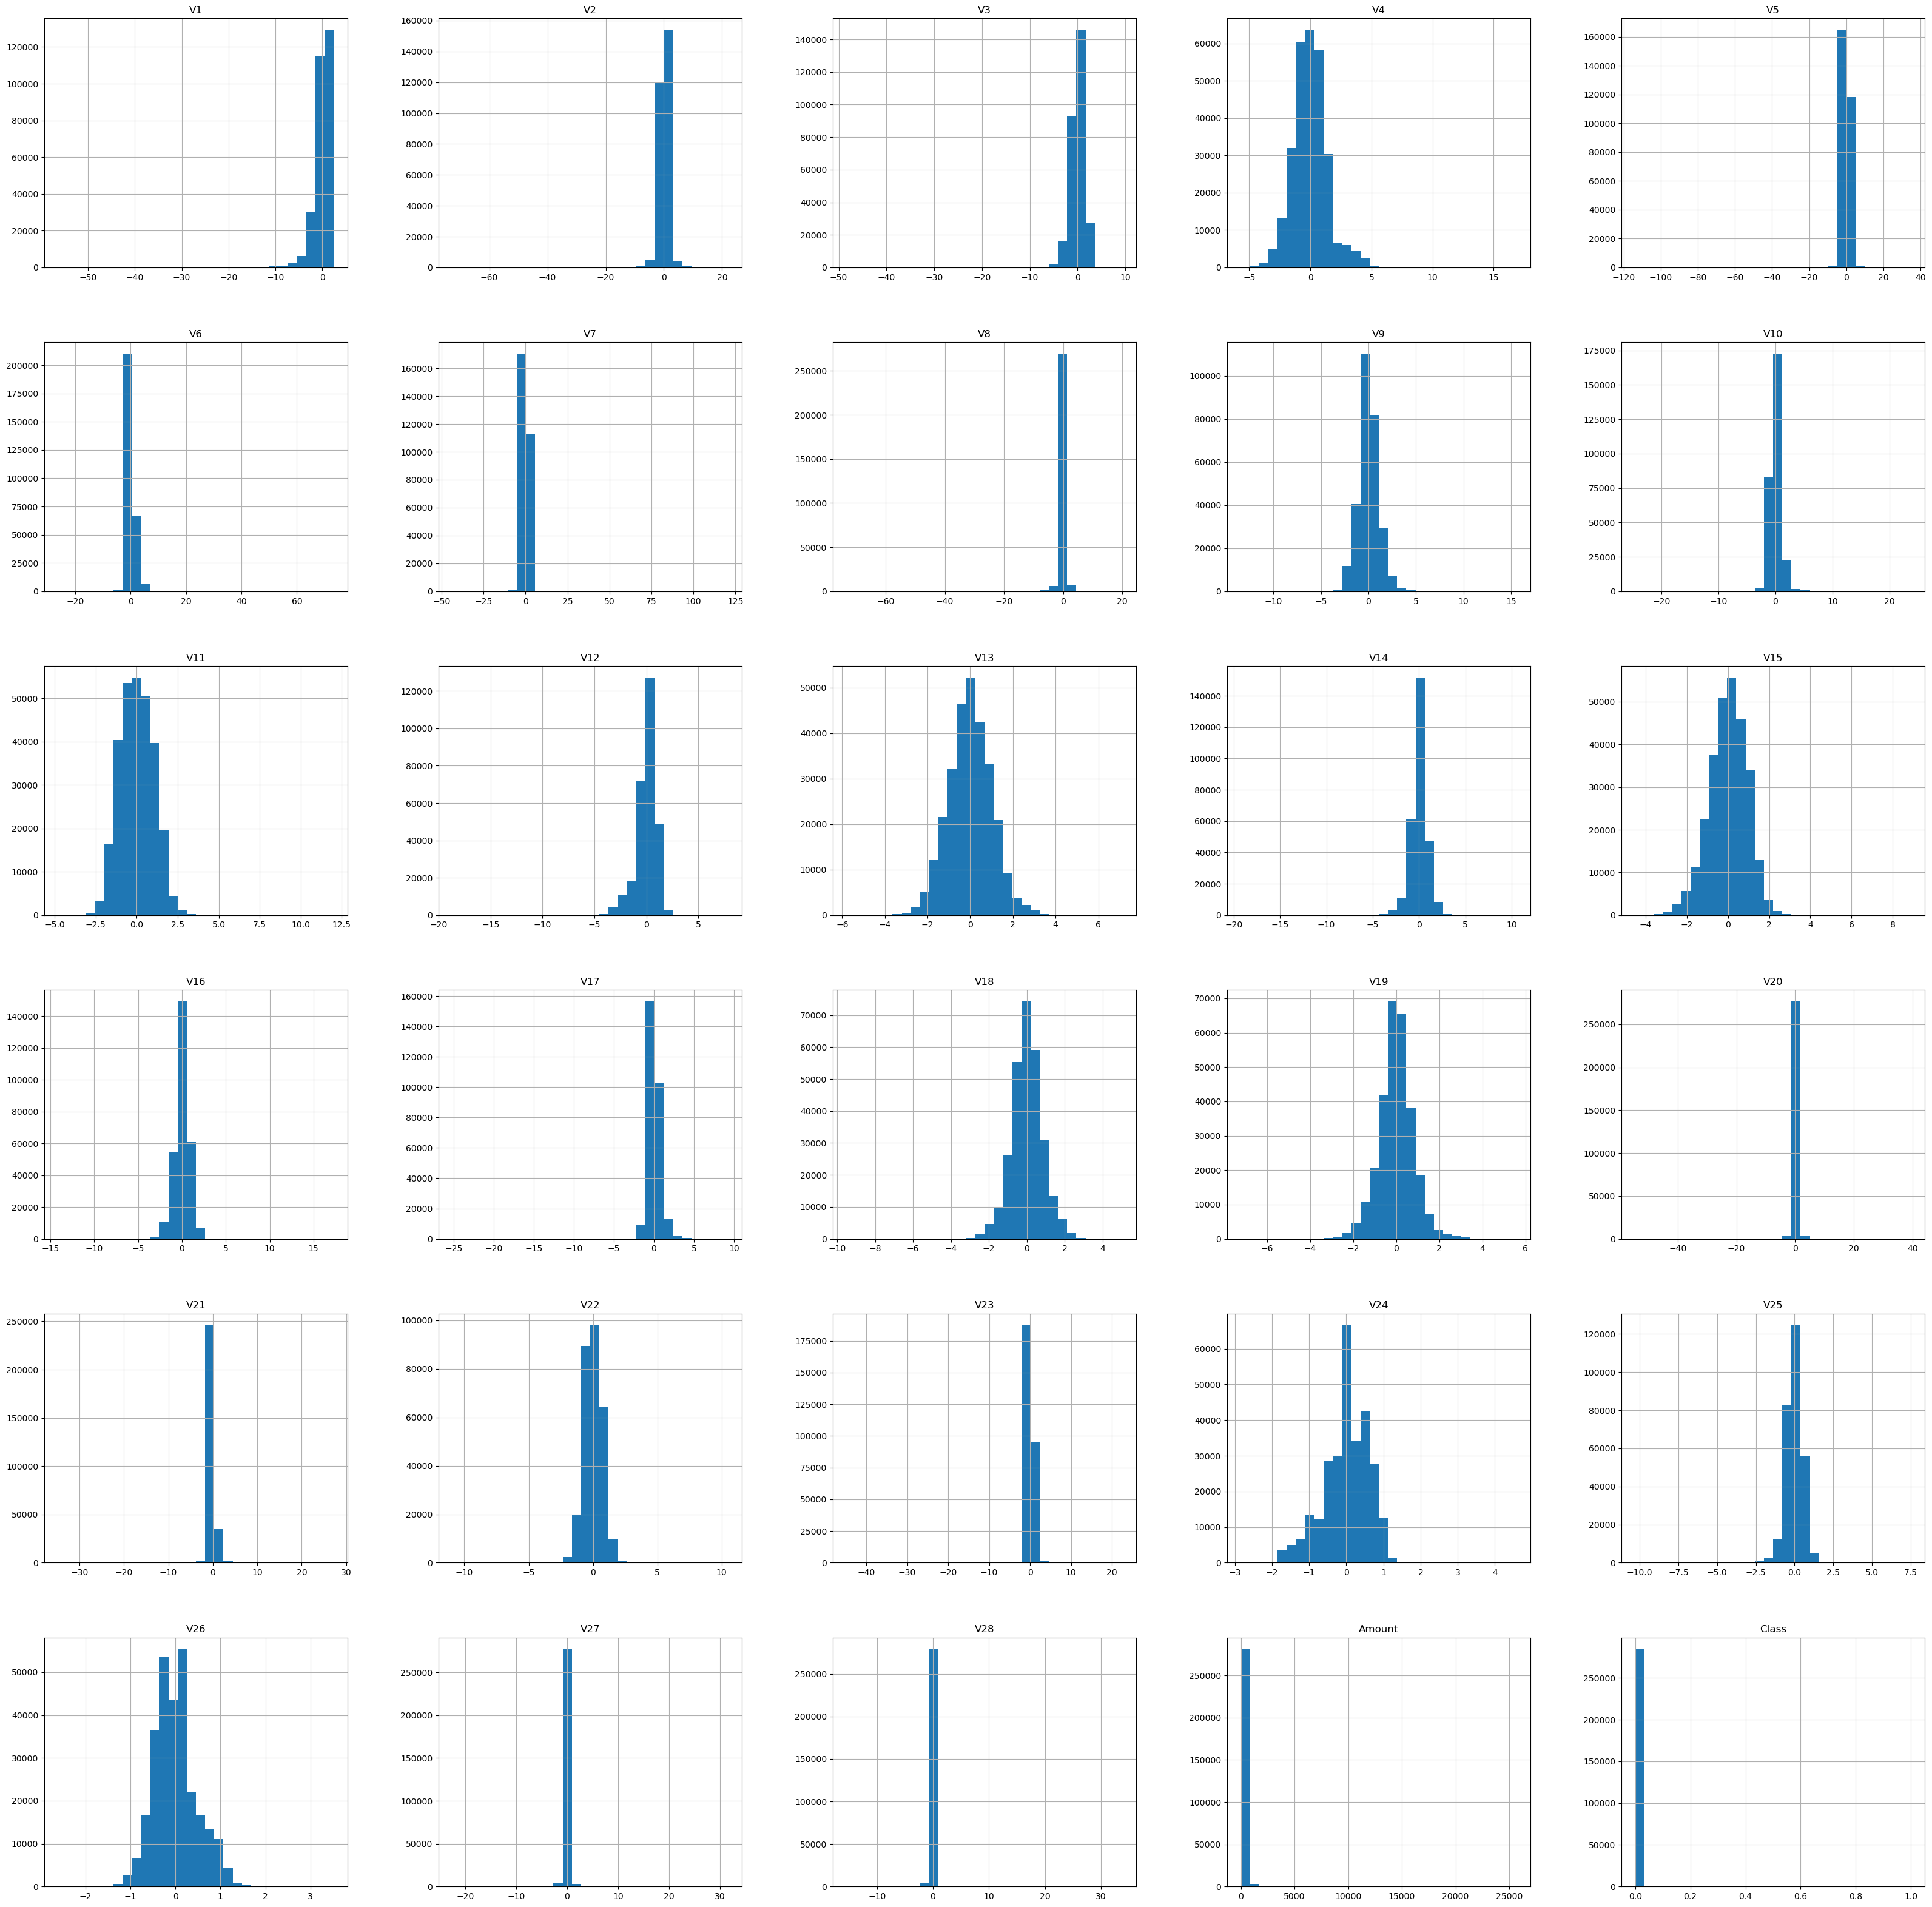

In [ ]:
credit_card_data.hist(bins=30,figsize=(40,40))

In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
credit_card_data.drop_duplicates(inplace=True)

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [ ]:
#This Dataset is highly unblanced
#0 --> legit Transaction
#1 --> fraudulent transaction
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
#legit.drop(["Time"],axis=1,inplace=True)

In [ ]:
print(legit.shape)
print(fraud.shape)

(275190, 30)
(473, 30)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    275190.000000
mean         90.521154
std         253.198478
min           0.000000
25%           6.390000
50%          23.750000
75%          79.900000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:

s=StandardScaler()
credit_card_data.Amount= s.fit_transform(credit_card_data.Amount.values.reshape(-1,1))
credit_card_data.Amount

0         0.233169
1        -0.347092
2         1.137702
3         0.130015
4        -0.081308
            ...   
284802   -0.354675
284803   -0.259814
284804   -0.089641
284805   -0.318223
284806    0.499269
Name: Amount, Length: 275663, dtype: float64

<Axes: >

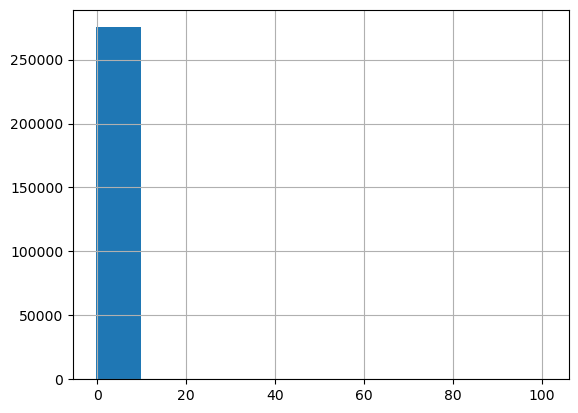

In [ ]:
credit_card_data['Amount'].hist()

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.029792,-0.008288,0.037131,-0.012054,-0.005596,-0.011768,0.017497,-0.007346,-0.008050,0.012492,...,0.002717,0.001781,0.005689,-0.001779,-0.006696,-0.004890,-0.000327,0.001557,0.000771,-0.000226
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.131484


In [ ]:
#Under-Sampling
#Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
#Number of Fraudulent Transactions --> 473
legit_sample = legit.sample(n=473)

In [ ]:
#Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)



In [ ]:
new_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
234183,2.172753,-0.861522,-1.291177,-0.942144,-0.780362,-1.215095,-0.526403,-0.190643,-0.520832,1.102631,...,0.470248,1.253129,0.006876,0.088974,0.099098,0.049377,-0.054875,-0.078556,15.00,0
83708,1.130918,-0.158175,1.152124,1.161441,-0.850914,0.282767,-0.730302,0.309247,0.793042,-0.005713,...,-0.042257,0.004679,-0.047303,-0.024028,0.396973,-0.402787,0.062218,0.022857,9.99,0
74052,1.152138,0.017441,1.298882,1.336636,-0.920340,-0.183504,-0.512457,0.051714,0.786909,-0.222356,...,-0.054075,0.082964,-0.012994,0.414958,0.438069,-0.411646,0.076870,0.039935,9.99,0
284240,-0.184215,0.624467,0.270662,-0.983220,1.066252,-0.207407,0.882082,-0.115241,0.204820,-0.992530,...,0.156173,0.689948,-0.337355,0.316818,-0.021448,0.114559,0.148067,0.174061,1.00,0
203903,1.879872,1.204888,-1.637091,4.176560,1.004166,-0.764106,0.542847,-0.226513,-1.198501,0.279537,...,-0.411571,-1.148080,0.283566,-0.322397,-0.227808,-0.343697,-0.001379,0.021460,20.05,0


In [ ]:
new_dataset.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.160466,0.083811,-0.058689,-0.019386,-0.022936,-0.100526,0.058628,-0.030247,-0.013311,0.052171,...,-0.029574,0.021026,0.003907,0.025642,0.012898,-0.010816,-0.012858,0.015405,-0.012004,88.431184
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [ ]:
#Splitting the data into Features & Targets
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

              V1        V2        V3        V4        V5        V6        V7  \
234183  2.172753 -0.861522 -1.291177 -0.942144 -0.780362 -1.215095 -0.526403   
83708   1.130918 -0.158175  1.152124  1.161441 -0.850914  0.282767 -0.730302   
74052   1.152138  0.017441  1.298882  1.336636 -0.920340 -0.183504 -0.512457   
284240 -0.184215  0.624467  0.270662 -0.983220  1.066252 -0.207407  0.882082   
203903  1.879872  1.204888 -1.637091  4.176560  1.004166 -0.764106  0.542847   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10  .

In [ ]:
print(Y)

234183    0
83708     0
74052     0
284240    0
203903    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(946, 29) (756, 29) (190, 29)


In [ ]:
#Model Training
#training the Logistics regression for binary classificationLogistics
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score( X_test_prediction, Y_test)

print('Accuracy on Training data : ', round(training_data_accuracy*100,2))
print('Accuracy score on Test Data : ', round(test_data_accuracy*100,2))

Accuracy on Training data :  95.11
Accuracy score on Test Data :  92.11


In [ ]:
print("Logistic Regression Performance:")
print("Accuracy:", round(accuracy_score(X_test_prediction,Y_test )*100,2))
print("Confusion Matrix:\n", confusion_matrix(X_test_prediction,Y_test))
print("Classification Report:\n", classification_report( X_test_prediction,Y_test))

Logistic Regression Performance:
Accuracy: 92.11
Confusion Matrix:
 [[92 12]
 [ 3 83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       104
           1       0.87      0.97      0.92        86

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.93      0.92      0.92       190



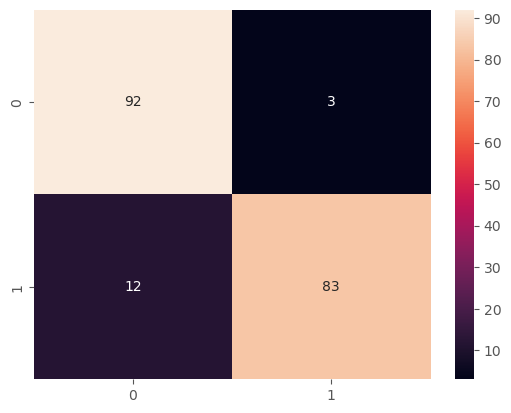

In [ ]:
with plt.style.context(('ggplot')):
    sns.heatmap(confusion_matrix(Y_test,X_test_prediction),annot=True)

In [ ]:
##########################################################################################

In [ ]:
##########################################################################################

In [ ]:
##########################################################################################

In [ ]:
#max_depth = int(math.ceil(math.sqrt(X_train.size)))
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
# accuracy on training data
X_train_predictiontree = dtree.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predictiontree, Y_train)

# accuracy on test data
X_test_predictiontree = dtree.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predictiontree, Y_test)

print('Accuracy on Training data : ', round(training_data_accuracy*100,2))
print('Accuracy score on Test Data : ', round(test_data_accuracy*100,2))

Accuracy on Training data :  100.0
Accuracy score on Test Data :  88.95


In [ ]:
print("DecisionTree Performance:")
print("Accuracy:", round(accuracy_score(X_test_predictiontree,Y_test )*100,2))
print("Confusion Matrix:\n", confusion_matrix(X_test_predictiontree,Y_test))
print("Classification Report:\n", classification_report( X_test_predictiontree,Y_test))

DecisionTree Performance:
Accuracy: 88.95
Confusion Matrix:
 [[88 14]
 [ 7 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       102
           1       0.85      0.92      0.89        88

    accuracy                           0.89       190
   macro avg       0.89      0.89      0.89       190
weighted avg       0.89      0.89      0.89       190



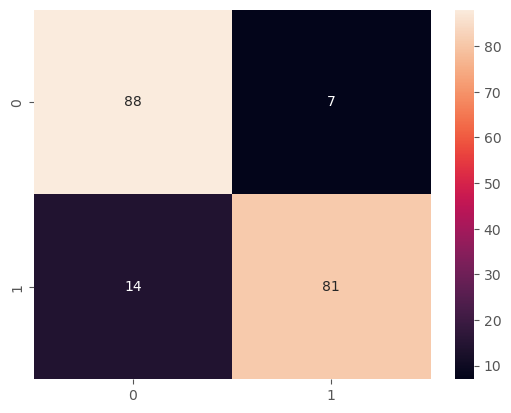

In [ ]:
with plt.style.context(('ggplot')):
    sns.heatmap(confusion_matrix(Y_test,X_test_predictiontree),annot=True)

In [ ]:
##########################################################################################


In [ ]:
##########################################################################################

In [ ]:
##########################################################################################

In [ ]:
##########################################################################################

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# accuracy on training data
X_train_predictiontr = regressor.predict(X_train)
#training_data_accuracy = accuracy_score(X_train_predictiontr, Y_train)
# accuracy on test data
X_test_predictiontr = regressor.predict(X_test)
#test_data_accuracy = accuracy_score(X_test_predictiontreer, Y_test)
#print('Accuracy on Training data : ', round(training_data_accuracy*100,2))
#print('Accuracy score on Test Data : ', round(test_data_accuracy*100,2))
print(metrics.mean_absolute_error(Y_test,X_test_predictiontr))
r2_score1=regressor.score(X_train,Y_train)
r2_score = regressor.score(X_test,Y_test)

0.250355942619078


In [ ]:
# accuracy on training data
X_train_predictiontr = regressor.predict(X_train)
#training_data_accuracy = accuracy_score(X_train_predictiontr, Y_train)

# accuracy on test data
X_test_predictiontr = regressor.predict(X_test)
#test_data_accuracy = accuracy_score(X_test_predictiontreer, Y_test)
#print('Accuracy on Training data : ', round(training_data_accuracy*100,2))
#print('Accuracy score on Test Data : ', round(test_data_accuracy*100,2))
#print ("error of linear reggresion")
#print(metrics.mean_absolute_error(Y_test,X_test_predictiontr))

r2_score = regressor.score(X_test,Y_test)
print ("error of linear reggresion")
print(metrics.mean_absolute_error(Y_test,X_test_predictiontr))
print("LinearRegression Performance:")
print("test accuary:")
print(r2_score*100,'%')
print("train accuary")
r2=regressor.score(X_train,Y_train)
x= print(r2*100,'%')
print("")

error of linear reggresion
0.250355942619078
LinearRegression Performance:
test accuary:
62.35595580495148 %
train accuary
63.45620447618769 %



In [ ]:
##########################################

In [ ]:
# GUI
def predict_transaction():
    try:
        # Get input values from entry fields
        input_values = [float(entry_list[i].get()) for i in range(29)]
        # Prepare data for prediction
        data = np.array([input_values])
        # Predict using the loaded model
        result = predict(model, data)
        # Show prediction result
        if result == 0:
            messagebox.showinfo("Result", "Legitimate Transaction")
        else:
            messagebox.showwarning("Result", "Fraudulent Transaction")
    except ValueError:
        messagebox.showerror("Error", "Invalid Input! Please enter numeric values.")



# Initialize GUI
root = tk.Tk()
root.title("Credit Card Fraud Detection")

# Load Image
#image_path = "credit.jpg"
#img = Image.open(CRD.jpg)
#img = img.resize((300, 150), Image.ANTIALIAS)
#img = ImageTk.PhotoImage(img)

# Display Image
#panel = tk.Label(root, image=img)
#panel.image = img
#panel.grid(row=0, columnspan=16)

# Text Label
text_label = tk.Label(root, text="Credit_Card_Fraud_Detection by logistic regression", font=("Helvetica", 14))
text_label.grid(row=1, columnspan=16)

# Define number of entries per row
entries_per_row = 8

# Label and Entry for input values
label_list = []
entry_list = []
for i in range(29):
    row_num = i // entries_per_row
    col_num = i % entries_per_row
    label = tk.Label(root, text="v" + str(i+1))
    label.grid(row=row_num+2, column=2*col_num, padx=5, pady=5, sticky="e")
    entry = tk.Entry(root, width=8)  # Set width for entry
    entry.grid(row=row_num+2, column=2*col_num + 1, padx=5, pady=5)
    label_list.append(label)
    entry_list.append(entry)

# Predict button
predict_button = tk.Button(root, text="Predict", command=predict_transaction)
predict_button.grid(row=(29 // entries_per_row) + 3, columnspan=entries_per_row, padx=10, pady=10)

root.mainloop()


In [ ]:
##########################################

In [ ]:
##########################################

In [ ]:
##########################################

In [ ]:
##########################################

In [ ]:
##########################################

In [ ]:
##########################################